In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
wal = pd.read_csv('C:/Users/User/Desktop/Walmart Sales Dataset of 45stores/walmart-sales-dataset-of-45stores.csv')

In [3]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
wal['Date'] = wal['Date'].str[6:] +'-'+ wal['Date'].str[3:5] + '-'+ wal['Date'].str[0:2]

In [11]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
wal = wal.set_index(['Date'])

In [6]:
wal.index = pd.to_datetime(wal.index)

In [17]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [18]:
wal.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
wal_1 = wal[wal['Store'] == 1]

In [8]:
wal = wal_1[['Weekly_Sales']]

In [9]:
len(wal)

143

In [172]:
train = wal.iloc[:-24]
test = wal.iloc[-24:]

In [ ]:
from sklearn,preprocessing import MinMaxScaler

In [173]:
scaler = MinMaxScaler()

In [174]:
scaler.fit(train)

MinMaxScaler()

In [175]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [176]:
n_input =24
n_features =1 
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [92]:
generator[0]

(array([[[0.30511304],
         [0.30349457]]]),
 array([[0.27549472]]))

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [177]:
model = Sequential()

In [178]:
model.add(LSTM(100,activation='relu',input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.fit_generator(generator, epochs = 50)

Epoch 1/50


C:\Users\User\AppData\Local\Temp\ipykernel_13924\2302594644.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 50)


95/95 [==============================] - 3s 9ms/step - loss: 0.0337
Epoch 2/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0298
Epoch 3/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0286
Epoch 4/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0311
Epoch 5/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0270
Epoch 6/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0273
Epoch 7/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0289
Epoch 8/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0284
Epoch 9/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0274
Epoch 10/50
95/95 [==============================] - 1s 10ms/step - loss: 0.0271
Epoch 11/50
95/95 [==============================] - 1s 12ms/step - loss: 0.0275
Epoch 12/50
95/95 [==============================] - 1s 9ms/step - loss: 0.0270
Epoch 13/50
95/95 [==============================] - 1s 9

In [180]:
first_eval_batch = scaled_train[-24:]

In [181]:
first_eval_batch

array([[0.24946027],
       [0.45075642],
       [0.52684458],
       [0.89005078],
       [0.16858528],
       [0.21798274],
       [0.13323537],
       [0.07235373],
       [0.00226533],
       [0.29824945],
       [0.45336606],
       [0.46960485],
       [0.20772918],
       [0.34687563],
       [0.33474773],
       [0.33665391],
       [0.18128808],
       [0.31063446],
       [0.54411753],
       [0.28395699],
       [0.19110069],
       [0.14194382],
       [0.34323363],
       [0.27468045]])

In [182]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [183]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 286ms/step


array([[0.2337997]], dtype=float32)

In [184]:
scaled_test[0]

array([0.26049421])

In [185]:
test_predictions = []

In [186]:
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 32ms/step


In [187]:
test_predictions

[array([0.2337997], dtype=float32),
 array([0.22614822], dtype=float32),
 array([0.22253188], dtype=float32),
 array([0.22082818], dtype=float32),
 array([0.2096112], dtype=float32),
 array([0.20431197], dtype=float32),
 array([0.19971892], dtype=float32),
 array([0.19545084], dtype=float32),
 array([0.19146219], dtype=float32),
 array([0.18819033], dtype=float32),
 array([0.18629773], dtype=float32),
 array([0.18618067], dtype=float32),
 array([0.1863227], dtype=float32),
 array([0.18513557], dtype=float32),
 array([0.18417758], dtype=float32),
 array([0.18373053], dtype=float32),
 array([0.18382998], dtype=float32),
 array([0.1837996], dtype=float32),
 array([0.18456462], dtype=float32),
 array([0.18614373], dtype=float32),
 array([0.18663023], dtype=float32),
 array([0.18699217], dtype=float32),
 array([0.18716721], dtype=float32),
 array([0.18746236], dtype=float32)]

In [188]:
true_predictions = scaler.inverse_transform(test_predictions)

In [189]:
true_predictions

array([[1567310.68244893],
       [1559115.56007137],
       [1555242.28338482],
       [1553417.52395427],
       [1541403.58007564],
       [1535727.82398167],
       [1530808.43956133],
       [1526237.10868291],
       [1521965.05788602],
       [1518460.72625304],
       [1516433.65910527],
       [1516308.27811548],
       [1516460.40790095],
       [1515188.9303916 ],
       [1514162.86829468],
       [1513684.05527602],
       [1513790.57166169],
       [1513758.0294216 ],
       [1514577.41078815],
       [1516268.71351852],
       [1516789.78835757],
       [1517177.43841625],
       [1517364.91938456],
       [1517681.03716265]])

In [190]:
test['Pred'] = true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_13924\1583589259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = true_predictions


In [191]:
test

,Weekly_Sales,Pred
Date,,
2012-05-18,1595901.87,1.567311e+06
2012-05-25,1555444.55,1.559116e+06
2012-06-01,1624477.58,1.555242e+06
2012-06-08,1697230.96,1.553418e+06
2012-06-15,1630607.00,1.541404e+06
2012-06-22,1527845.81,1.535728e+06
2012-06-29,1540421.49,1.530808e+06
2012-07-06,1769854.16,1.526237e+06
2012-07-13,1527014.04,1.521965e+06


<AxesSubplot:xlabel='Date'>

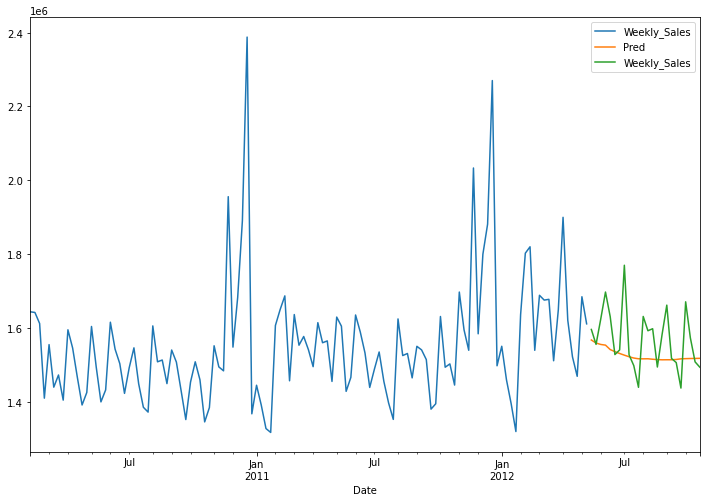

In [201]:
train.plot(figsize  = (12,8),legend = True)
test['Pred'].plot(legend = True)
test['Weekly_Sales'].plot(legend = True)

In [194]:
from sklearn.metrics import mean_squared_error

In [196]:
(mean_squared_error(test['Weekly_Sales'],test['Pred']))**0.5

88227.681596869

In [198]:
(mean_squared_error(test['Weekly_Sales'],test['Pred']))**0.5/test['Pred'].mean()

0.05780788443052547